# Building muliple models 


## References
https://www.kaggle.com/code/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy#Step-5:-Model-Data

## Libarray imports

In [11]:
# Library imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

#misc libraries
import random
import time

# Disabling warnings:
import warnings
warnings.filterwarnings('ignore') 
plt.style.use('ggplot')



#load packages
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))
import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))
import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))
import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))
import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 
import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

import os

#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

Python version: 3.11.5 (main, Sep 11 2023, 13:54:46) [GCC 11.2.0]
pandas version: 2.1.2
matplotlib version: 3.7.2
NumPy version: 1.24.3
IPython version: 8.15.0
scikit-learn version: 1.3.0
-------------------------


In [12]:
# Seeding:
def seed_all(seed):
    
    ''' A function to seed everything for getting stable results and reproducibility'''
    random.seed(seed)
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

seed = 42    
seed_all(seed)

## Data Loading and preprcessing

In [13]:
# The repo which has the data
from ucimlrepo import fetch_ucirepo

In [14]:
# this function allows you read the data from remote repository or previously downloaded 
# copy from local folder
def read_data(local=True, local_file_name="diabetes_raw_data.csv"):
    """Reads the raw dataset from either local csv file or from UCI repository

    Args:
        local (bool, optional): Indicator for local file or remote. Defaults to True.

    Returns:
        _type_: A DataFrame containing data read from local or remote csv file
    """
    if local:
        return pd.read_csv(local_file_name)
    else:
        # fetch dataset from UCI
        cdc_diabetes_health_indicators = fetch_ucirepo(id=891)
        
        # data (as pandas dataframes) 
        X = cdc_diabetes_health_indicators.data.features 
        y = cdc_diabetes_health_indicators.data.targets 
        # Lets join the features and target variable into a single data frame
        return pd.concat([X,y],axis=1)

In [15]:
# read the data from remote repo
# df = read_data(local=False, local_file_name=None)

# saving this data so I don't keep downloading from UCI
# df.to_csv("diabetes_raw_data.csv",index=False)

# read the dataset from previously downloaded file - which I named "diabetes_raw_data.csv"
df_raw = read_data(local=True, local_file_name="diabetes_raw_data.csv")

In [16]:
df = df_raw.copy().drop_duplicates(keep= 'first', ignore_index=True)

In [17]:
# Re map the categorical data which will then be encoded using dummies etc

# Adults who have been told they have high blood pressure by a doctor, nurse, or other health professional
# 0 = no high BP 1 = high BP
df["HighBP"] = df["HighBP"].map({0 : 'no', 1 : 'yes'})
# Have you EVER been told by a doctor, nurse or other health professional that your blood cholesterol is high?

df["HighChol"] = df["HighChol"].map({0 : 'no', 1 : 'yes'})

# Cholesterol check within past five years 
df["CholCheck"] = df["CholCheck"].map({0 : 'no', 1 : 'yes'})

# Have you smoked at least 100 cigarettes in your entire life?
df["Smoker"] = df["Smoker"].map({0:'no', 1:'yes'})

# (Ever told) you had a stroke. 0 = no 1 = yes
df["Stroke"] = df["Stroke"].map({0 : 'no', 1:'yes'})

# coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes
df["HeartDiseaseorAttack"] = df["HeartDiseaseorAttack"].map({0:'no', 1:'yes'})

# physical activity in past 30 days - not including job 0 = no 1 = yes
df["PhysActivity"] = df["PhysActivity"].map({0:'no', 1:'yes'})

# Consume Fruit 1 or more times per day 0 = no 1 = yes
df["Fruits"] = df["Fruits"].map({0:'no', 1:'yes'})

# Consume Vegetables 1 or more times per day 0 = no 1 = yes
df["Veggies"] = df["Veggies"].map({0:'no', 1:'yes'})

# Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) 0 = no 1 = yes
df["HvyAlcoholConsump"] = df["HvyAlcoholConsump"].map({0:'no', 1:'yes'})

# Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes
df["AnyHealthcare"] = df["AnyHealthcare"].map({0:'no', 1:'yes'})

# Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes
df["NoDocbcCost"] = df["NoDocbcCost"].map({0:'no', 1:'yes'})

# Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor
df["GenHlth"] = df["GenHlth"].map({1:'excellent', 2:'very_good', 3:'good', 4:'fair', 5:'poor'})

# Now thinking about your mental health, which includes stress, depression, and problems with emotions, 
# for how many days during the past 30 days was your mental health not good? scale 1-30 days
################df["MentHlth"] = df["MentHlth"].map({})
# Now thinking about your physical health, which includes physical illness and injury, 
# for how many days during the past 30 days was your physical health not good? scale 1-30 days
###############df["PhysHlth"] = df["PhysHlth"].map({})

# Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes
df["DiffWalk"] = df["DiffWalk"].map({0:'no', 1:'yes'})

# Gender of the person
df["Sex"] = df["Sex"].map({0:'female', 1:'male'})

#https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/discussion/295407
# 13-level age category (_AGEG5YR see codebook) 1 = 18-24 9 = 60-64 13 = 80 or older
df["Age"] = df["Age"].map({1:'18_24', 2:'25_29',3:  '30_34',4:'35_39',5:'40_44',6:'45_49',
                                   7:'50_54',8:'55_59',9:'60_64',10:'65_69',11:'70_74',12:'75_79',13:'80_'})

# What is the highest grade or year of school you completed? = EDUCA
# 1 = Never attended school or only kindergarten 
# 2 = Grades 1 through 8 (Elementary) 
# 3 = Grades 9 through 11 (Some high school) 
# 4 = Grade 12 or GED (High school graduate) 
# 5 = College 1 year to 3 years (Some college or technical school) 
# 6 = College 4 years or more (College graduate)
df["Education"] = df["Education"].map({1:"uneducated",
                                        2:"elementary",
                                        3:"some_high_school",
                                        4:"high_school_graduate",
                                        5:"some_college",
                                        6:"college_graduate"})

# Income scale (INCOME2 see codebook)
df["Income"] = df["Income"].map({1:"LT10k",
                                  2:"10k_15k",
                                  3:"15k_20k",
                                  4:"20k_25k",
                                  5:"25k_35k",
                                  6:"35k_50k",
                                  7:"50k_75k",
                                  8:"GT75k"})

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229474 entries, 0 to 229473
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   HighBP                229474 non-null  object
 1   HighChol              229474 non-null  object
 2   CholCheck             229474 non-null  object
 3   BMI                   229474 non-null  int64 
 4   Smoker                229474 non-null  object
 5   Stroke                229474 non-null  object
 6   HeartDiseaseorAttack  229474 non-null  object
 7   PhysActivity          229474 non-null  object
 8   Fruits                229474 non-null  object
 9   Veggies               229474 non-null  object
 10  HvyAlcoholConsump     229474 non-null  object
 11  AnyHealthcare         229474 non-null  object
 12  NoDocbcCost           229474 non-null  object
 13  GenHlth               229474 non-null  object
 14  MentHlth              229474 non-null  int64 
 15  PhysHlth         

## Modelling

In [18]:
from sklearn.model_selection import cross_validate, KFold, StratifiedKFold, learning_curve,  cross_val_score, RandomizedSearchCV, train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, IsolationForest
from mlxtend.plotting import plot_confusion_matrix

from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay, classification_report

In [19]:
numericals = ['BMI','MentHlth', 'PhysHlth']
categoricals = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']
target = "Diabetes_binary"

In [20]:
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

# Lets use dummies to convert categorical features to one hot encoding
X = pd.get_dummies(data=X, columns= categoricals)#, sparse=True

In [28]:
# Selecting some sklearn classifiers:

logClass = LogisticRegression(random_state=seed, solver='sag',max_iter=1000,n_jobs=-1)
dectree = DecisionTreeClassifier(random_state=seed)
gradclass = GradientBoostingClassifier(random_state=seed)
randfclass = RandomForestClassifier(random_state=seed,n_jobs=-1)

In [29]:
# Setting 5 fold CV:
cv = StratifiedKFold(5, shuffle=True, random_state=seed) 
classifiers = [logClass, dectree, gradclass, randfclass]

In [30]:
def model_check(X, y, classifiers, cv):
    
    ''' A function for testing multiple classifiers and return several metrics. '''
    
    model_table = pd.DataFrame()

    row_index = 0
    for cls in classifiers:

        MLA_name = cls.__class__.__name__
        model_table.loc[row_index, 'Model Name'] = MLA_name
        
        cv_results = cross_validate(
            cls,
            X,
            y,
            cv=cv,
            scoring=('accuracy','f1','roc_auc'),
            return_train_score=True,
            n_jobs=-1
        )
        model_table.loc[row_index, 'Train Roc/AUC Mean'] = cv_results['train_roc_auc'].mean()
        model_table.loc[row_index, 'Test Roc/AUC Mean'] = cv_results['test_roc_auc'].mean()
        model_table.loc[row_index, 'Test Roc/AUC Std'] = cv_results['test_roc_auc'].std()
        model_table.loc[row_index, 'Train Accuracy Mean'] = cv_results['train_accuracy'].mean()
        model_table.loc[row_index, 'Test Accuracy Mean'] = cv_results['test_accuracy'].mean()
        model_table.loc[row_index, 'Test Acc Std'] = cv_results['test_accuracy'].std()
        model_table.loc[row_index, 'Train F1 Mean'] = cv_results['train_f1'].mean()
        model_table.loc[row_index, 'Test F1 Mean'] = cv_results[ 'test_f1'].mean()
        model_table.loc[row_index, 'Test F1 Std'] = cv_results['test_f1'].std()
        model_table.loc[row_index, 'Time'] = cv_results['fit_time'].mean()

        row_index += 1        

    model_table.sort_values(by=['Test F1 Mean'],
                            ascending=False,
                            inplace=True)

    return model_table

In [31]:
raw_models = model_check(X, y, classifiers, cv)

Information on various evaluation metrics https://neptune.ai/blog/f1-score-accuracy-roc-auc-pr-auc#:~:text=F1%20score%20vs%20Accuracy,observations%20both%20positive%20and%20negative.

In [32]:
#https://pandas.pydata.org/docs/reference/api/pandas.io.formats.style.Styler.background_gradient.html
raw_models.style.background_gradient(axis=0)  

,Model Name,Train Roc/AUC Mean,Test Roc/AUC Mean,Test Roc/AUC Std,Train Accuracy Mean,Test Accuracy Mean,Test Acc Std,Train F1 Mean,Test F1 Mean,Test F1 Std,Time
1,DecisionTreeClassifier,0.999886,0.584943,0.001637,0.994556,0.774397,0.000974,0.981880,0.297766,0.002181,5.550403
2,GradientBoostingClassifier,0.815042,0.813030,0.002578,0.854061,0.853583,0.000974,0.251061,0.247951,0.008221,115.698796
3,RandomForestClassifier,0.999883,0.770207,0.002398,0.994520,0.841324,0.000877,0.981855,0.238708,0.005068,78.872005
0,LogisticRegression,0.809919,0.809579,0.002440,0.852205,0.852136,0.000890,0.237159,0.236158,0.006789,85.467047


In [37]:
def plot_feature_importances(classifiers, X, y, bins):
    
    ''' A function for displaying feature importances'''
    
    fig, axes = plt.subplots(1, 2, figsize=(20, 10))
    axes = axes.flatten()

    for ax, classifier in zip(axes, classifiers):

        try:
            classifier.fit(X, y)
            feature_imp = pd.DataFrame(sorted(
                zip(classifier.feature_importances_, X.columns)),
                                       columns=['Value', 'Feature'])

            sns.barplot(x="Value",
                        y="Feature",
                        data=feature_imp.sort_values(by="Value",
                                                     ascending=False),
                        ax=ax,
                        palette='plasma')
            plt.title('Features')
            plt.tight_layout()
            ax.set(title=f'{classifier.__class__.__name__} Feature Impotances')
            ax.xaxis.set_major_locator(MaxNLocator(nbins=bins))
        except:
            continue
    plt.show()

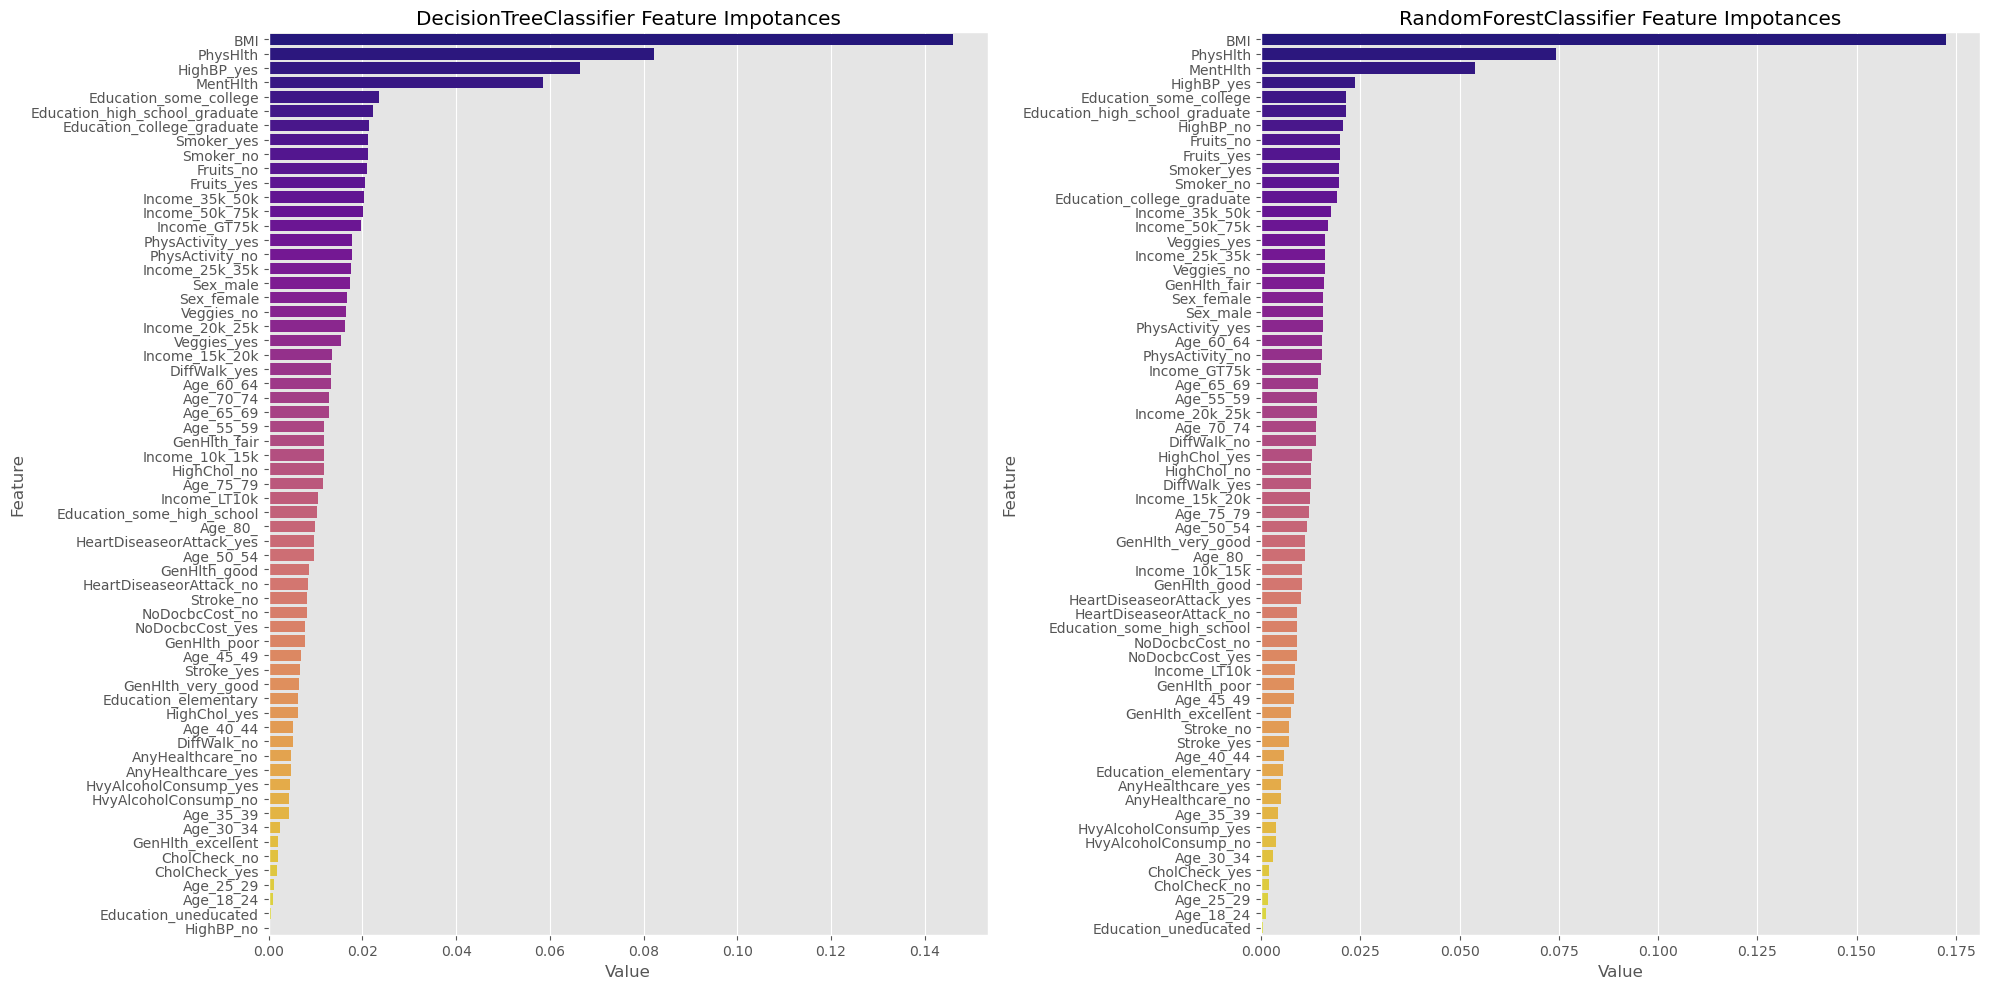

In [40]:
plot_feature_importances((dectree, randfclass), X, y, 6 )

### Improve models to reduce overfitting

We will do this by removing Outliers which we detected during EDA

Automatic Outlier Detection
Before going to tune our models I decided to get rid of some outliers, we have pretty small database and we can actually remove them by hand or more basic methods. 
But I wanted to use what sklearn can offer us for this so we gonna try couple sklearn features.

In [43]:
# Applying Isolation Forest:

iForest = IsolationForest(contamination=0.1,random_state=seed)
# Fit the isolation forect on X
y_pred = iForest.fit_predict(X)
# filter for outliers
mask = (y_pred != -1)
# remove those outliers
X_clean = X.loc[mask, :]
y_clean= y[mask]

In [54]:
print("After removing {0} outliers, we are left with {1} records".format((len(X)- len(X_clean)), len(X_clean)))  

After removing 22948 outliers, we are left with 206526 records


In [55]:
cv = StratifiedKFold(5, shuffle=True, random_state=seed) 
classifiers = [dectree, gradclass, randfclass]

cleaned_models = model_check(X_clean, y_clean, classifiers, cv)

In [56]:
cleaned_models.style.background_gradient(axis=0)

,Model Name,Train Roc/AUC Mean,Test Roc/AUC Mean,Test Roc/AUC Std,Train Accuracy Mean,Test Accuracy Mean,Test Acc Std,Train F1 Mean,Test F1 Mean,Test F1 Std,Time
0,DecisionTreeClassifier,0.999845,0.578216,0.002517,0.993955,0.790302,0.000959,0.977310,0.271787,0.003486,5.756649
2,RandomForestClassifier,0.999842,0.761153,0.003531,0.993928,0.854788,0.001353,0.977369,0.188061,0.006072,61.590681
1,GradientBoostingClassifier,0.811520,0.809199,0.003234,0.867534,0.866990,0.001065,0.188169,0.184384,0.002251,95.304847


### Hyperparameter tuning using RandomizedSearchCV

I will be tuning parameters for these models - I took inspiration for thsi section from the following articles

https://inria.github.io/scikit-learn-mooc/python_scripts/ensemble_hyperparameters.html

https://stats.stackexchange.com/questions/565488/what-does-high-auc-score-but-poor-f1-indicate-for-imbalanced-dataset

https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/

https://www.kaggle.com/code/gauravduttakiit/hyperparameter-tuning-in-decision-trees

In [ ]:
gradclass = GradientBoostingClassifier(random_state=seed,learning_rate=0.2)
randfclass = RandomForestClassifier(random_state=seed,n_jobs=-1)

In [73]:
# Searching parameters for fine tuning:
   
for i in [randfclass]:
#gradclass]:#, randfclass]:
           
    #if i==gradclass:
    #    parameters={
    #        'max_depth':[8, 10, 12, 15], 
    #        'min_samples_split':range(200,800,100),
    #        'n_estimators':[50, 100, 150, 200],
    #    }
    
    if i == randfclass:
        parameters = {
            'n_estimators':range(10,201,10),
            'max_depth': [10, 15,20,25],
            #'n_estimators': [50, 100, 150, 200],
            #'criterion': ['gini', 'entropy'],
            'bootstrap': [True, False],
            #'max_features':[1,3,5],
        }
    
    def hyperparameter_tune(base_model, parameters, n_iter, cv, X, y):
        
        ''' A function for optimizing mutliple classifiers'''
        
        start_time = time.time()
        optimal_model = RandomizedSearchCV(base_model,
                                param_distributions=parameters,
                                n_iter=n_iter,
                                cv=cv,
                                scoring = 'roc_auc',#'f1',
                                n_jobs=-1,
                                random_state=seed)

        optimal_model.fit(X, y)    


        scores = cross_val_score(optimal_model, X, y, cv=cv,n_jobs=-1, scoring='f1')
        stop_time = time.time()

        print('====================')
        print(f'Updated Parameters for {str(base_model.__class__.__name__)}')
        print('Cross Val Mean: {:.3f}, Cross Val Stdev: {:.3f}'.format(scores.mean(), scores.std()))
        print('Best Score: {:.3f}'.format(optimal_model.best_score_))
        print('Best Parameters: {}'.format(optimal_model.best_params_))
        print('Elapsed Time:', time.strftime('%H:%M:%S', time.gmtime(stop_time - start_time)))
        print('====================')


        return optimal_model.best_params_, optimal_model.best_score_
    
    
    best_params, best_score = hyperparameter_tune(i, parameters, 5, cv, X_clean, y_clean)
    i.set_params(**best_params)

Updated Parameters for RandomForestClassifier
Cross Val Mean: 0.121, Cross Val Stdev: 0.002
Best Score: 0.802
Best Parameters: {'n_estimators': 90, 'max_depth': 15, 'bootstrap': False}
Elapsed Time: 00:30:36
